In [1]:
from salishsea_tools import LiveOcean_BCs as nancy

import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
import scipy as sc
import matplotlib.cm as cm
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools)
import seabird
import cmocean as cmo
import gsw
from seabird.cnv import fCNV
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
import scipy.io
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from eofs.standard import Eof

from dateutil        import parser
from datetime import datetime


/home/ssahu/anaconda3/lib/python3.5/site-packages/xarray/conventions.py:9: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [6]:
date = '2013-08-20'
d = nancy.load_LiveOcean(date)

In [13]:
d.keys()

KeysView(<xarray.Dataset>
Dimensions:        (eta_rho: 31, eta_u: 31, eta_v: 30, ocean_time: 1, s_rho: 40, xi_rho: 26, xi_u: 25, xi_v: 26)
Coordinates:
    lon_rho        (eta_rho, xi_rho) float64 -125.0 -125.0 -125.0 -124.9 ...
    lat_rho        (eta_rho, xi_rho) float64 48.32 48.32 48.32 48.32 48.32 ...
  * s_rho          (s_rho) float64 -0.9875 -0.9625 -0.9375 -0.9125 -0.8875 ...
  * ocean_time     (ocean_time) datetime64[ns] 2013-08-20T12:00:00
    lon_u          (eta_u, xi_u) float64 -125.0 -125.0 -125.0 -124.9 -124.9 ...
    lat_u          (eta_u, xi_u) float64 48.32 48.32 48.32 48.32 48.32 48.32 ...
    lon_v          (eta_v, xi_v) float64 -125.0 -125.0 -125.0 -124.9 -124.9 ...
    lat_v          (eta_v, xi_v) float64 48.32 48.32 48.32 48.32 48.32 48.32 ...
  * eta_rho        (eta_rho) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
  * xi_rho         (xi_rho) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
  * eta_u          (eta_u) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 

In [33]:
live_lon = d.variables['lon_rho']
live_lat = d.variables['lat_rho']

live_rho = d.variables['rho']
live_sal = d.variables['salt']
live_temp =d.variables['temp']

In [9]:
# bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

bathy = nc.Dataset('/data/ssahu/WCVI_sliced_bathy_NEP36_original.nc')


Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.array(np.arange(180,350))
x_wcvi_slice = np.array(np.arange(480,650))

# z_wcvi = Z[y_wcvi_slice, x_wcvi_slice]
lon_wcvi = bathy['nav_lon']#[180:350, 480:650]
lat_wcvi = bathy['nav_lat']#[180:350, 480:650]


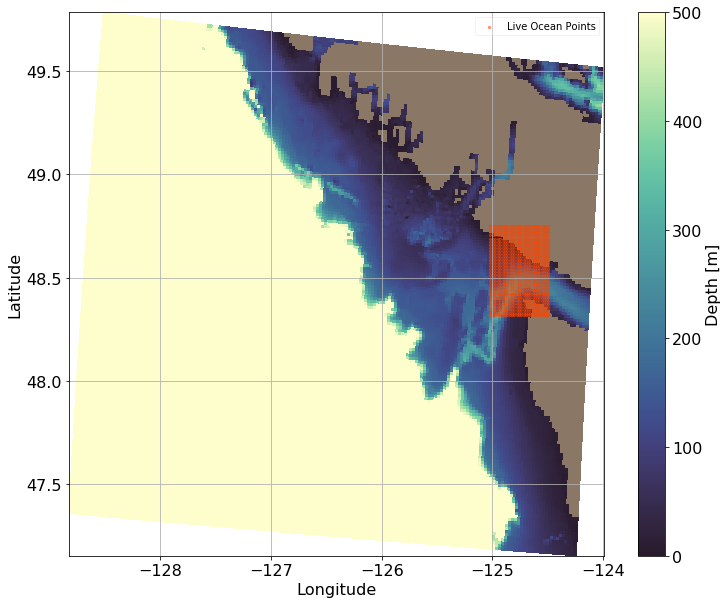

In [24]:


# y = np.empty_like(lat_location)
# x = np.empty_like(lat_location)

cmap = cmo.cm.deep_r
cmap.set_bad('#8b7765')

fig, ax = plt.subplots(1, 1, figsize=(12,10)); ax.grid()

viz_tools.set_aspect(ax, coords='map', lats=lat_wcvi, adjustable='box-forced')

p = ax.pcolormesh(lon_wcvi,lat_wcvi,Z, cmap=cmap, vmin=0, vmax=500)
cbar = fig.colorbar(p, ax=ax)
ax.set_aspect('auto')


# for i in np.arange(lat_location.shape[0]):
#     y[i], x[i] = geo_tools.find_closest_model_point(
#                lon_location[i],lat_location[i],lon_wcvi,lat_wcvi,tols={
#         'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
    
# n = np.empty_like(lat_location)
# m = np.empty_like(lat_location)


# for i in np.arange(lat_location.shape[0]):
#     n[i], m[i] = geo_tools.find_closest_model_point(
#                lon_location[i],lat_location[i],lon_wcvi,lat_wcvi,tols={
#         'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

# # y = y.astype(int)
# # x = x.astype(int)

# # n = n.astype(int)
# # m = m.astype(int)
# ax.scatter(x[:], y[:], c='orangered', s=100, alpha=0.5, label = 'Falkor CTD locations')

ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
# ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)

lon_W02 = -124.89500
lat_W02 = 48.04167

lon_W01 = -124.82500
lat_W01 = 48.31500

lon_A1 = -126.20433
lat_A1 = 48.52958

# ax.scatter(lon_A1, lat_A1,  c='green', s=150, alpha=0.8, label = 'A1 Mooring')

# ax.scatter(lon_W01, lat_W01, c='cyan', s=150, alpha=0.8, label = 'W01')

# ax.scatter(lon_W02, lat_W02, c='red', s=150, alpha=0.8, label = 'W02')

ax.scatter(live_lon, live_lat, c='orangered',s =5,  alpha=0.5, label = 'Live Ocean Points')

legend = ax.legend(loc='lower left', fancybox=True, framealpha=0.25)

cbar.ax.set_ylabel('Depth [m]', fontsize=16)
ax.tick_params(axis='both',labelsize =16)
cbar.ax.tick_params(labelsize=16) 
ax.grid()




legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)

# plt.tight_layout(pad=0, w_pad=0, h_pad=0)

path_to_save = '/home/ssahu/saurav/NEP36_Model_Eval_plots/'
plt.savefig(path_to_save + 'Domain.png')

In [35]:
live_rho[0,:,0,0]

<xarray.Variable (s_rho: 40)>
array([ 27.67589951,  27.65503311,  27.63434029,  27.61356163,
        27.59288788,  27.57277489,  27.55282974,  27.53251839,
        27.51113701,  27.48803711,  27.4625473 ,  27.43375969,
        27.40130806,  27.36433983,  27.32182312,  27.27569389,
        27.2243576 ,  27.16307831,  27.08737946,  26.99538422,
        26.89031219,  26.76848793,  26.62510681,  26.46365929,
        26.27536774,  26.08022499,  25.8593483 ,  25.60749245,
        25.35406876,  25.07568169,  24.75859642,  24.40962219,
        24.05430031,  23.78596115,  23.59705734,  23.48993492,
        23.42627907,  23.39375114,  23.37819099,  23.3727169 ])
Attributes:
    long_name: density anomaly
    units: kilogram meter-3
    time: ocean_time
    grid: grid
    location: face
    field: density, scalar, series

In [27]:

for k in np.arange(live_temp.shape[1]):

    for j in np.arange(live_temp.shape[2]):
        
        for i in np.arange(live_temp.shape[3]):

            pressure_survey[k,j,i] = gsw.p_from_z(-depths_survey[j],lat_survey[i])

            SA_survey[j,i] = gsw.SA_from_SP(sal_survey[j,i], pressure_survey[j,i], lon_survey[i], lat_survey[i])

            CT_survey[j,i] = gsw.CT_from_pt(sal_survey[j,i], temp_survey[j,i])

            spic_survey[j,i] = gsw.spiciness0(SA_survey[j,i], CT_survey[j,i])

(31, 26)

In [29]:
live_s = d.variables['s_rho']

In [36]:
live_sal.shape

(1, 40, 31, 26)